Using Colab cache for faster access to the 'skin-disease-detection-dataset' dataset.
Path to dataset files: /kaggle/input/skin-disease-detection-dataset

🔄 Combining 'train' and 'val' folders from Kaggle dataset (unique images only)...
✅ Merging complete (no duplicates added)!

📂 Splitting combined dataset into train/val/test (no duplicates)...


Splitting classes: 100%|██████████| 15/15 [00:35<00:00,  2.35s/it]
/tmp/ipython-input-2538471879.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Class", x="Count", data=train_df.sort_values("Count", ascending=False), palette="viridis")



✅ Dataset split complete!
Train → /kaggle/working/data_split/train
Val   → /kaggle/working/data_split/val
Test  → /kaggle/working/data_split/test

Train Set Summary:
                          Class  Count
0                         Acne   3268
1            Actinic Keratosis   2955
2         Basal Cell Carcinoma   2834
3                   Chickenpox   3001
4              Dermato Fibroma   2863
5           Dyshidrotic Eczema   2665
6                     Melanoma   2925
7                  Nail Fungus   2833
8                        Nevus   3622
9                  Normal Skin   3046
10  Pigmented Benign Keratosis   2759
11                    Ringworm   2914
12        Seborrheic Keratosis   2659
13     Squamous Cell Carcinoma   2639
14             Vascular Lesion   2828

Validation Set Summary:
                          Class  Count
0                         Acne    989
1            Actinic Keratosis    902
2         Basal Cell Carcinoma    866
3                   Chickenpox    920
4       

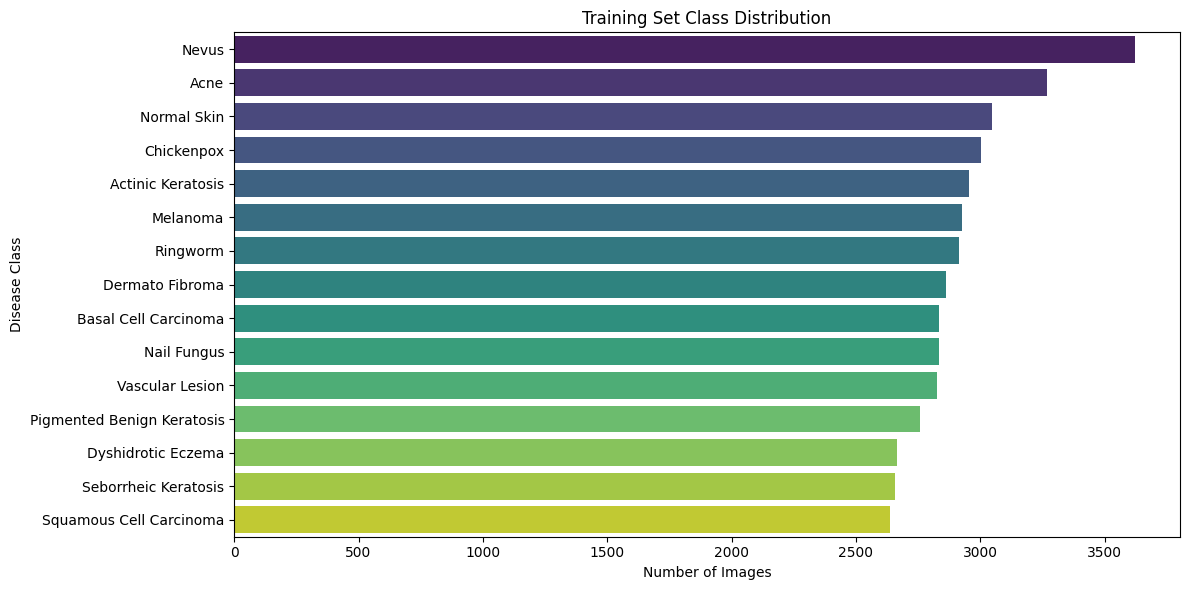

/tmp/ipython-input-2538471879.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Class", x="Count", data=val_df.sort_values("Count", ascending=False), palette="magma")


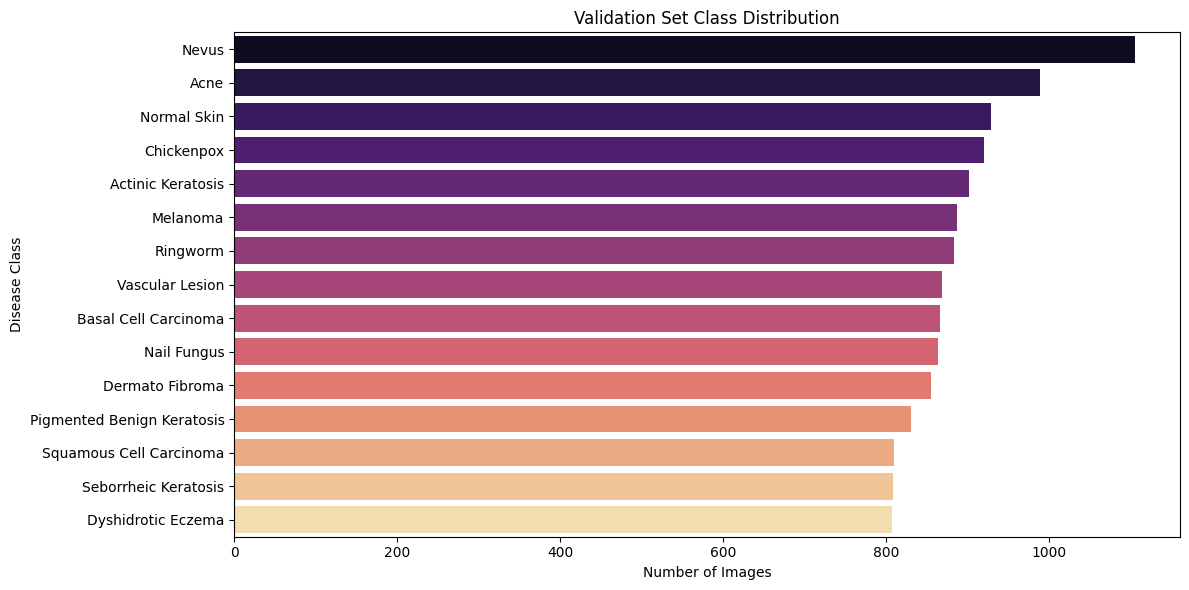

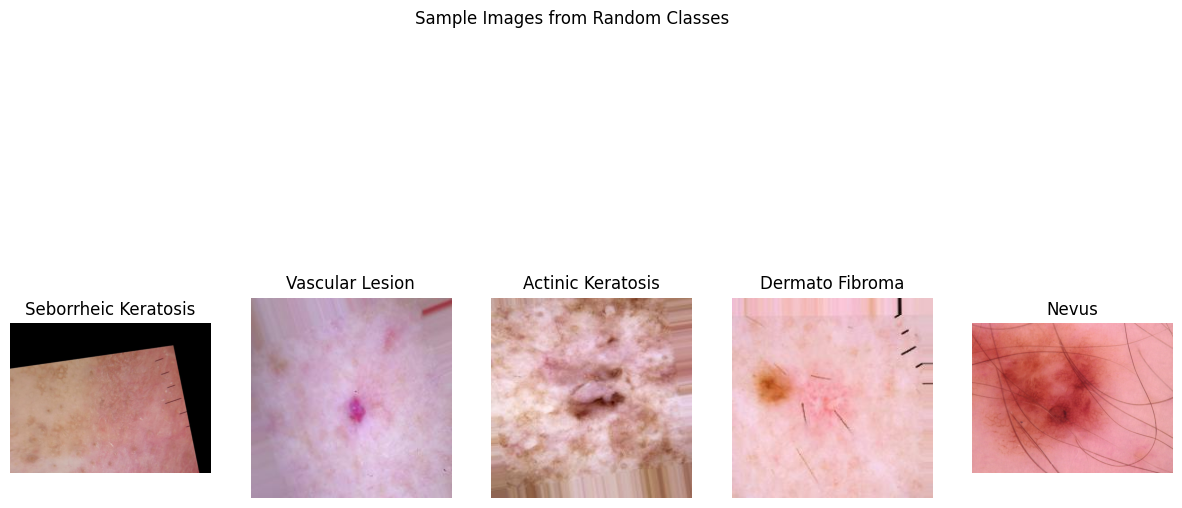


Image Properties Summary:
              Width       Height
count  1500.000000  1500.000000
mean    423.218000   357.313333
std     360.464714   261.848650
min     100.000000   100.000000
25%     224.000000   224.000000
50%     224.000000   224.000000
75%     600.000000   450.000000
max    6668.000000  4419.000000


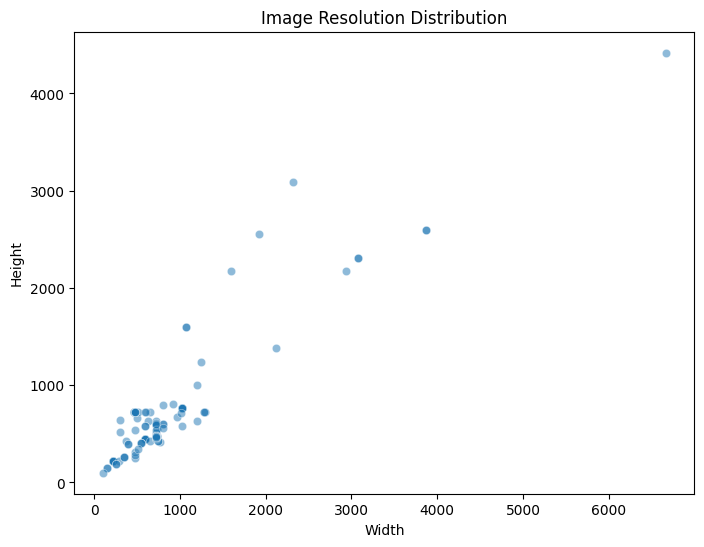

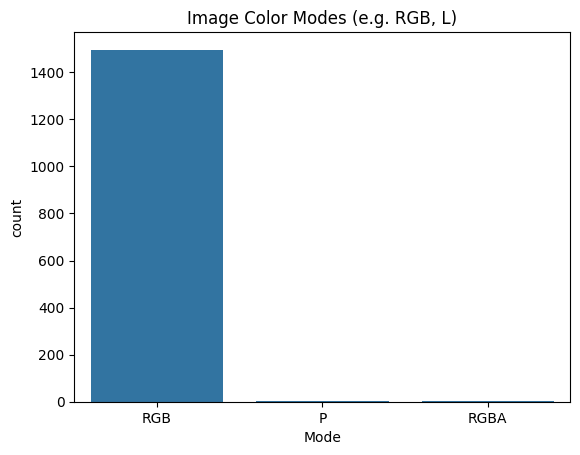


✅ Full EDA and preprocessing completed successfully! You now have:
• Train images: 43811
• Validation images: 13321
• Test images: 13363
• Total images: 70495


In [ ]:
# ======================================================
#Import Libraries
# ======================================================
import os
import shutil
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm
import kagglehub

# ======================================================
# Download Dataset from Kaggle
# ======================================================
path = kagglehub.dataset_download("mgmitesh/skin-disease-detection-dataset")
print("Path to dataset files:", path)



# ======================================================
# Merge Original Train + Val Folders (No Duplicates)
# ======================================================
combined_input_dir = os.path.join("/kaggle/working", "combined_dataset")
os.makedirs(combined_input_dir, exist_ok=True)

print("\n Combining 'train' and 'val' folders from Kaggle dataset (unique images only)...")
for folder in [os.path.join(path, "train"), os.path.join(path, "val")]:
    for cls in os.listdir(folder):
        src_cls = os.path.join(folder, cls)
        dst_cls = os.path.join(combined_input_dir, cls)
        os.makedirs(dst_cls, exist_ok=True)
        for img_name in os.listdir(src_cls):
            src = os.path.join(src_cls, img_name)
            dst = os.path.join(dst_cls, img_name)
            if not os.path.exists(dst):  # ✅ Prevent duplicates
                shutil.copy(src, dst)
print(" Merging complete (no duplicates added)!")

# ======================================================
# Create New Train / Val / Test Splits (No Extra Copies)
# ======================================================
output_dir = "/kaggle/working/data_split"
train_output = os.path.join(output_dir, "train")
val_output = os.path.join(output_dir, "val")
test_output = os.path.join(output_dir, "test")

os.makedirs(train_output, exist_ok=True)
os.makedirs(val_output, exist_ok=True)
os.makedirs(test_output, exist_ok=True)

VAL_RATIO = 0.15
TEST_RATIO = 0.15

print("\n Splitting combined dataset into train/val/test (no duplicates)...")
for cls in tqdm(sorted(os.listdir(combined_input_dir)), desc="Splitting classes"):
    cls_path = os.path.join(combined_input_dir, cls)
    if not os.path.isdir(cls_path):
        continue

    images = os.listdir(cls_path)
    random.shuffle(images)

    n_total = len(images)
    n_val = int(n_total * VAL_RATIO)
    n_test = int(n_total * TEST_RATIO)

    val_imgs = images[:n_val]
    test_imgs = images[n_val:n_val+n_test]
    train_imgs = images[n_val+n_test:]

    # Copy exactly once to the correct split
    for subset, subset_imgs in zip(
        [train_output, val_output, test_output],
        [train_imgs, val_imgs, test_imgs]
    ):
        os.makedirs(os.path.join(subset, cls), exist_ok=True)
        for img_name in subset_imgs:
            src = os.path.join(cls_path, img_name)
            dst = os.path.join(subset, cls, img_name)
            shutil.copy(src, dst)

print("\n Dataset split complete!")
print(f"Train → {train_output}")
print(f"Val   → {val_output}")
print(f"Test  → {test_output}")

# ======================================================
#  Helper Function: Class Distribution
# ======================================================
def get_class_distribution(directory):
    classes, counts = [], []
    for class_name in sorted(os.listdir(directory)):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            classes.append(class_name)
            counts.append(len(os.listdir(class_path)))
    return pd.DataFrame({"Class": classes, "Count": counts})

# ======================================================
# Analyze Train / Val / Test
# ======================================================
train_df = get_class_distribution(train_output)
val_df = get_class_distribution(val_output)
test_df = get_class_distribution(test_output)

print("\nTrain Set Summary:\n", train_df)
print("\nValidation Set Summary:\n", val_df)
print("\nTest Set Summary:\n", test_df)

# ======================================================
#  Plot Class Distributions
# ======================================================
plt.figure(figsize=(12,6))
sns.barplot(y="Class", x="Count", data=train_df.sort_values("Count", ascending=False), palette="viridis")
plt.title("Training Set Class Distribution")
plt.xlabel("Number of Images")
plt.ylabel("Disease Class")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(y="Class", x="Count", data=val_df.sort_values("Count", ascending=False), palette="magma")
plt.title("Validation Set Class Distribution")
plt.xlabel("Number of Images")
plt.ylabel("Disease Class")
plt.tight_layout()
plt.show()

# ======================================================
# Display Random Sample Images
# ======================================================
def show_sample_images(directory, n_classes=5):
    classes = random.sample(os.listdir(directory), n_classes)
    plt.figure(figsize=(15, 8))
    for i, cls in enumerate(classes, 1):
        cls_path = os.path.join(directory, cls)
        img_name = random.choice(os.listdir(cls_path))
        img_path = os.path.join(cls_path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, n_classes, i)
        plt.imshow(img)
        plt.title(cls)
        plt.axis("off")
    plt.suptitle("Sample Images from Random Classes")
    plt.show()

show_sample_images(train_output)

# ======================================================
#  Image Properties (Resolution, Color Mode)
# ======================================================
def check_image_properties(directory, n_samples=100):
    widths, heights, modes = [], [], []
    for cls in os.listdir(directory):
        cls_path = os.path.join(directory, cls)
        if os.path.isdir(cls_path):
            sample_imgs = random.sample(os.listdir(cls_path), min(n_samples, len(os.listdir(cls_path))))
            for img_name in sample_imgs:
                img_path = os.path.join(cls_path, img_name)
                try:
                    img = Image.open(img_path)
                    widths.append(img.size[0])
                    heights.append(img.size[1])
                    modes.append(img.mode)
                except:
                    pass
    return pd.DataFrame({"Width": widths, "Height": heights, "Mode": modes})

img_stats = check_image_properties(train_output)
print("\nImage Properties Summary:\n", img_stats.describe())

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Width", y="Height", data=img_stats, alpha=0.5)
plt.title("Image Resolution Distribution")
plt.show()

sns.countplot(x="Mode", data=img_stats)
plt.title("Image Color Modes (e.g. RGB, L)")
plt.show()

# ======================================================
#  Final Summary
# ======================================================
total_train = train_df['Count'].sum()
total_val = val_df['Count'].sum()
total_test = test_df['Count'].sum()
total_all = total_train + total_val + total_test

print("\n✅ Full EDA and preprocessing completed successfully! You now have:")
print(f"• Train images: {total_train}")
print(f"• Validation images: {total_val}")
print(f"• Test images: {total_test}")
print(f"• Total images: {total_all}")

# Sanity check
if abs(total_all - 48233) < 50:
    print("\n🎯 Dataset split verified! Total images consistent with original dataset (~48K).")
else:
    print("\n⚠️ Warning: Image count mismatch detected. Check merge/split logic.")


Using Colab cache for faster access to the 'skin-disease-detection-dataset' dataset.
Path to dataset files: /kaggle/input/skin-disease-detection-dataset

🔄 Combining 'train' and 'val' folders from Kaggle dataset (unique images only)...
✅ Merging complete (no duplicates added)!

📂 Splitting combined dataset into train/val/test (no duplicates)...


Splitting classes: 100%|██████████| 15/15 [00:27<00:00,  1.80s/it]
/tmp/ipython-input-1336258485.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Class", x="Count", data=train_df.sort_values("Count", ascending=False), palette="viridis")



✅ Dataset split complete!
Train → /kaggle/working/data_split/train
Val   → /kaggle/working/data_split/val
Test  → /kaggle/working/data_split/test

Train Set Summary:
                          Class  Count
0                         Acne   2524
1            Actinic Keratosis   2278
2         Basal Cell Carcinoma   2173
3                   Chickenpox   2311
4              Dermato Fibroma   2193
5           Dyshidrotic Eczema   2049
6                     Melanoma   2251
7                  Nail Fungus   2185
8                        Nevus   2786
9                  Normal Skin   2337
10  Pigmented Benign Keratosis   2114
11                    Ringworm   2261
12        Seborrheic Keratosis   2045
13     Squamous Cell Carcinoma   2037
14             Vascular Lesion   2176

Validation Set Summary:
                          Class  Count
0                         Acne    540
1            Actinic Keratosis    487
2         Basal Cell Carcinoma    465
3                   Chickenpox    495
4       

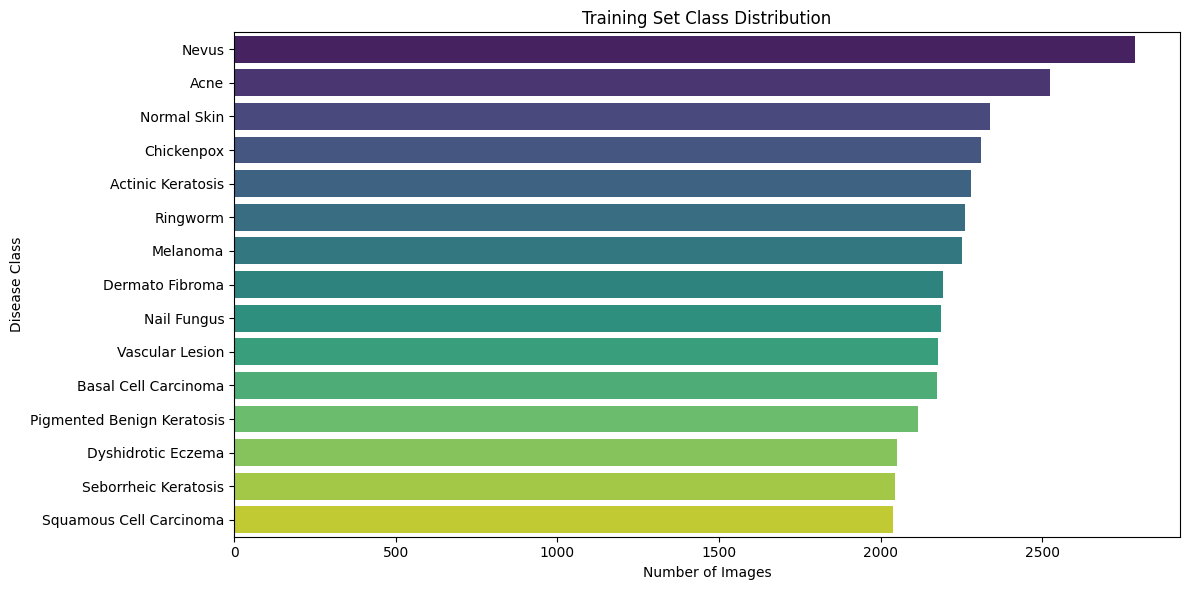

/tmp/ipython-input-1336258485.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Class", x="Count", data=val_df.sort_values("Count", ascending=False), palette="magma")


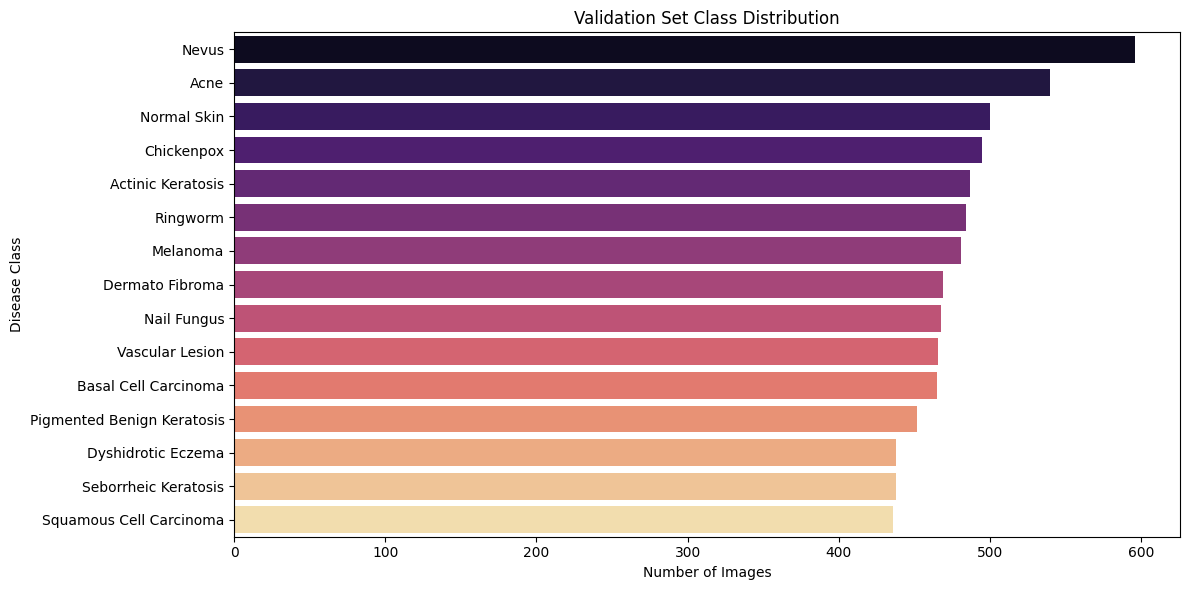

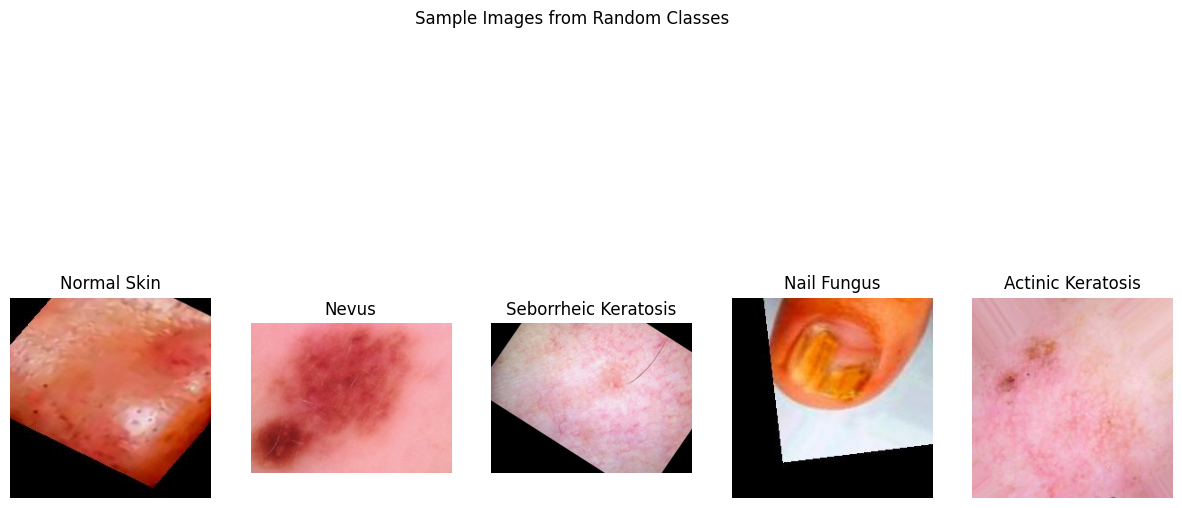


Image Properties Summary:
              Width       Height
count  1500.000000  1500.000000
mean    417.031333   357.331333
std     297.110283   228.807647
min     150.000000   150.000000
25%     224.000000   224.000000
50%     224.000000   224.000000
75%     600.000000   450.000000
max    2848.000000  2560.000000


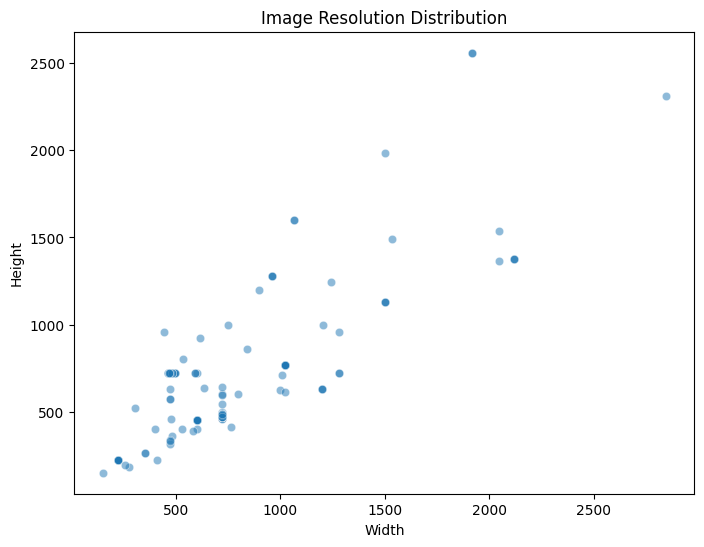

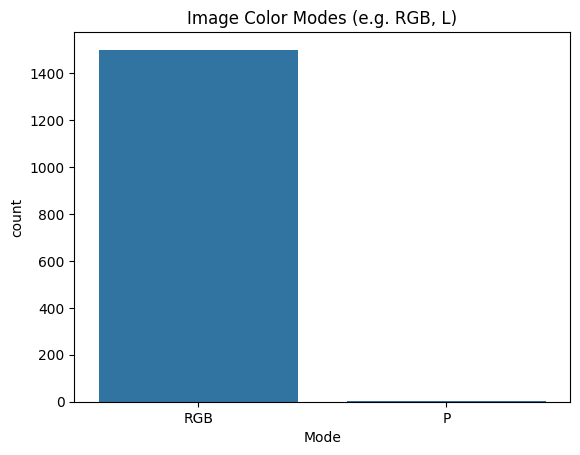


✅ Full EDA and preprocessing completed successfully! You now have:
• Train images: 33720
• Validation images: 7215
• Test images: 7215
• Total images: 48150

⚠️ Warning: Image count mismatch detected. Check merge/split logic.


In [ ]:
# ======================================================
#  Import Libraries
# ======================================================
import os
import shutil
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm
import kagglehub


def recreate_folder(path):
    """Delete folder if exists, then recreate cleanly."""
    if os.path.exists(path):
        shutil.rmtree(path)
    os.makedirs(path, exist_ok=True)

# ======================================================
#  Download Dataset from Kaggle
# ======================================================
path = kagglehub.dataset_download("mgmitesh/skin-disease-detection-dataset")
print("Path to dataset files:", path)

# ======================================================
#  Merge Original Train + Val Folders (No Duplicates, Cleaned Each Run)
# ======================================================
combined_input_dir = os.path.join("/kaggle/working", "combined_dataset")
recreate_folder(combined_input_dir)  

print("\n🔄 Combining 'train' and 'val' folders from Kaggle dataset (unique images only)...")
for folder in [os.path.join(path, "train"), os.path.join(path, "val")]:
    for cls in os.listdir(folder):
        src_cls = os.path.join(folder, cls)
        dst_cls = os.path.join(combined_input_dir, cls)
        os.makedirs(dst_cls, exist_ok=True)
        for img_name in os.listdir(src_cls):
            src = os.path.join(src_cls, img_name)
            dst = os.path.join(dst_cls, img_name)
            if not os.path.exists(dst):  
                shutil.copy(src, dst)
print("✅ Merging complete (no duplicates added)!")

# ======================================================
#  Create New Train / Val / Test Splits (Cleaned Each Run)
# ======================================================
output_dir = "/kaggle/working/data_split"
train_output = os.path.join(output_dir, "train")
val_output = os.path.join(output_dir, "val")
test_output = os.path.join(output_dir, "test")

# Clean previous splits before creating new ones
recreate_folder(output_dir)
os.makedirs(train_output, exist_ok=True)
os.makedirs(val_output, exist_ok=True)
os.makedirs(test_output, exist_ok=True)

VAL_RATIO = 0.15
TEST_RATIO = 0.15

print("\n📂 Splitting combined dataset into train/val/test (no duplicates)...")
for cls in tqdm(sorted(os.listdir(combined_input_dir)), desc="Splitting classes"):
    cls_path = os.path.join(combined_input_dir, cls)
    if not os.path.isdir(cls_path):
        continue

    images = os.listdir(cls_path)
    random.shuffle(images)

    n_total = len(images)
    n_val = int(n_total * VAL_RATIO)
    n_test = int(n_total * TEST_RATIO)

    val_imgs = images[:n_val]
    test_imgs = images[n_val:n_val + n_test]
    train_imgs = images[n_val + n_test:]

    # Copy exactly once to correct split
    for subset, subset_imgs in zip(
        [train_output, val_output, test_output],
        [train_imgs, val_imgs, test_imgs]
    ):
        os.makedirs(os.path.join(subset, cls), exist_ok=True)
        for img_name in subset_imgs:
            src = os.path.join(cls_path, img_name)
            dst = os.path.join(subset, cls, img_name)
            shutil.copy(src, dst)

print("\n✅ Dataset split complete!")
print(f"Train → {train_output}")
print(f"Val   → {val_output}")
print(f"Test  → {test_output}")

# ======================================================
#  Helper Function: Class Distribution
# ======================================================
def get_class_distribution(directory):
    classes, counts = [], []
    for class_name in sorted(os.listdir(directory)):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            classes.append(class_name)
            counts.append(len(os.listdir(class_path)))
    return pd.DataFrame({"Class": classes, "Count": counts})

# ======================================================
# Analyze Train / Val / Test
# ======================================================
train_df = get_class_distribution(train_output)
val_df = get_class_distribution(val_output)
test_df = get_class_distribution(test_output)

print("\nTrain Set Summary:\n", train_df)
print("\nValidation Set Summary:\n", val_df)
print("\nTest Set Summary:\n", test_df)

# ======================================================
#  Plot Class Distributions
# ======================================================
plt.figure(figsize=(12,6))
sns.barplot(y="Class", x="Count", data=train_df.sort_values("Count", ascending=False), palette="viridis")
plt.title("Training Set Class Distribution")
plt.xlabel("Number of Images")
plt.ylabel("Disease Class")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(y="Class", x="Count", data=val_df.sort_values("Count", ascending=False), palette="magma")
plt.title("Validation Set Class Distribution")
plt.xlabel("Number of Images")
plt.ylabel("Disease Class")
plt.tight_layout()
plt.show()

# ======================================================
#  Display Random Sample Images
# ======================================================
def show_sample_images(directory, n_classes=5):
    classes = random.sample(os.listdir(directory), n_classes)
    plt.figure(figsize=(15, 8))
    for i, cls in enumerate(classes, 1):
        cls_path = os.path.join(directory, cls)
        img_name = random.choice(os.listdir(cls_path))
        img_path = os.path.join(cls_path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, n_classes, i)
        plt.imshow(img)
        plt.title(cls)
        plt.axis("off")
    plt.suptitle("Sample Images from Random Classes")
    plt.show()

show_sample_images(train_output)

# ======================================================
#  Image Properties (Resolution, Color Mode)
# ======================================================
def check_image_properties(directory, n_samples=100):
    widths, heights, modes = [], [], []
    for cls in os.listdir(directory):
        cls_path = os.path.join(directory, cls)
        if os.path.isdir(cls_path):
            sample_imgs = random.sample(os.listdir(cls_path), min(n_samples, len(os.listdir(cls_path))))
            for img_name in sample_imgs:
                img_path = os.path.join(cls_path, img_name)
                try:
                    img = Image.open(img_path)
                    widths.append(img.size[0])
                    heights.append(img.size[1])
                    modes.append(img.mode)
                except:
                    pass
    return pd.DataFrame({"Width": widths, "Height": heights, "Mode": modes})

img_stats = check_image_properties(train_output)
print("\nImage Properties Summary:\n", img_stats.describe())

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Width", y="Height", data=img_stats, alpha=0.5)
plt.title("Image Resolution Distribution")
plt.show()

sns.countplot(x="Mode", data=img_stats)
plt.title("Image Color Modes (e.g. RGB, L)")
plt.show()

# ======================================================
#  Final Summary
# ======================================================
total_train = train_df['Count'].sum()
total_val = val_df['Count'].sum()
total_test = test_df['Count'].sum()
total_all = total_train + total_val + total_test

print("\n✅ Full EDA and preprocessing completed successfully! You now have:")
print(f"• Train images: {total_train}")
print(f"• Validation images: {total_val}")
print(f"• Test images: {total_test}")
print(f"• Total images: {total_all}")

# Sanity check
if abs(total_all - 48233) < 50:
    print("\n🎯 Dataset split verified! Total images consistent with original dataset (~48K).")
else:
    print("\n⚠️ Warning: Image count mismatch detected. Check merge/split logic.")


In [ ]:
# ======================================================
#  Import Libraries
# ======================================================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    LearningRateScheduler
)
from tensorflow.keras.optimizers import Adam
import math

# ======================================================
#  Define Paths
# ======================================================
train_dir = "/kaggle/working/data_split/train"
val_dir = "/kaggle/working/data_split/val"
test_dir = "/kaggle/working/data_split/test"

# ======================================================
#  Data Preprocessing & Augmentation
# ======================================================
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# ======================================================
#  Build ResNet50 Model
# ======================================================
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # freeze base layers

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.4)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# ======================================================
# Learning Rate Scheduler (Cosine Annealing with Warmup)
# ======================================================
initial_lr = 1e-4
warmup_epochs = 2
total_epochs = 10

def cosine_annealing_with_warmup(epoch):
    if epoch < warmup_epochs:
        lr = initial_lr * (epoch + 1) / warmup_epochs
    else:
        cosine_decay = 0.5 * (1 + math.cos(math.pi * (epoch - warmup_epochs) / (total_epochs - warmup_epochs)))
        lr = initial_lr * cosine_decay
    print(f"Epoch {epoch+1}: Learning Rate = {lr:.6f}")
    return lr

lr_scheduler = LearningRateScheduler(cosine_annealing_with_warmup)

# ======================================================
#  Compile Model
# ======================================================
model.compile(
    optimizer=Adam(learning_rate=initial_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ======================================================
#  Callbacks
# ======================================================
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint("best_resnet50_scheduler_10epochs.h5", monitor='val_accuracy', save_best_only=True, verbose=1),
    lr_scheduler
]

# ======================================================
#  Train Model 
# ======================================================
EPOCHS = total_epochs

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

# ======================================================
#  Evaluate on Validation and Test Set
# ======================================================
val_loss, val_acc = model.evaluate(val_generator, verbose=1)
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

print("\n Training completed successfully!")
print(f"• Validation Accuracy: {val_acc * 100:.2f}%")
print(f"• Validation Loss: {val_loss:.4f}")
print(f"• Test Accuracy: {test_acc * 100:.2f}%")
print(f"• Test Loss: {test_loss:.4f}")


Found 33720 images belonging to 15 classes.
Found 7215 images belonging to 15 classes.
Found 7215 images belonging to 15 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,644,495 (94.01 MB)

 Trainable params: 1,056,783 (4.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1: Learning Rate = 0.000050
Epoch 1/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.4183 - loss: 1.8595
Epoch 1: val_accuracy improved from -inf to 0.76674, saving model to best_resnet50_scheduler_10epochs.h5


1054/1054 ━━━━━━━━━━━━━━━━━━━━ 502s 465ms/step - accuracy: 0.4184 - loss: 1.8590 - val_accuracy: 0.7667 - val_loss: 0.6708 - learning_rate: 5.0000e-05
Epoch 2: Learning Rate = 0.000100
Epoch 2/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.7051 - loss: 0.8222
Epoch 2: val_accuracy improved from 0.76674 to 0.81331, saving model to best_resnet50_scheduler_10epochs.h5


1054/1054 ━━━━━━━━━━━━━━━━━━━━ 468s 444ms/step - accuracy: 0.7051 - loss: 0.8221 - val_accuracy: 0.8133 - val_loss: 0.5322 - learning_rate: 1.0000e-04
Epoch 3: Learning Rate = 0.000100
Epoch 3/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.7506 - loss: 0.6818
Epoch 3: val_accuracy improved from 0.81331 to 0.83091, saving model to best_resnet50_scheduler_10epochs.h5


1054/1054 ━━━━━━━━━━━━━━━━━━━━ 462s 439ms/step - accuracy: 0.7506 - loss: 0.6818 - val_accuracy: 0.8309 - val_loss: 0.4785 - learning_rate: 1.0000e-04
Epoch 4: Learning Rate = 0.000096
Epoch 4/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.7783 - loss: 0.6110
Epoch 4: val_accuracy improved from 0.83091 to 0.83895, saving model to best_resnet50_scheduler_10epochs.h5


1054/1054 ━━━━━━━━━━━━━━━━━━━━ 458s 435ms/step - accuracy: 0.7783 - loss: 0.6110 - val_accuracy: 0.8389 - val_loss: 0.4541 - learning_rate: 9.6194e-05
Epoch 5: Learning Rate = 0.000085
Epoch 5/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.7898 - loss: 0.5619
Epoch 5: val_accuracy improved from 0.83895 to 0.84906, saving model to best_resnet50_scheduler_10epochs.h5


1054/1054 ━━━━━━━━━━━━━━━━━━━━ 459s 436ms/step - accuracy: 0.7898 - loss: 0.5619 - val_accuracy: 0.8491 - val_loss: 0.4220 - learning_rate: 8.5355e-05
Epoch 6: Learning Rate = 0.000069
Epoch 6/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.8069 - loss: 0.5286
Epoch 6: val_accuracy improved from 0.84906 to 0.85170, saving model to best_resnet50_scheduler_10epochs.h5


1054/1054 ━━━━━━━━━━━━━━━━━━━━ 477s 452ms/step - accuracy: 0.8069 - loss: 0.5286 - val_accuracy: 0.8517 - val_loss: 0.4172 - learning_rate: 6.9134e-05
Epoch 7: Learning Rate = 0.000050
Epoch 7/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.8087 - loss: 0.5181
Epoch 7: val_accuracy improved from 0.85170 to 0.86057, saving model to best_resnet50_scheduler_10epochs.h5


1054/1054 ━━━━━━━━━━━━━━━━━━━━ 468s 444ms/step - accuracy: 0.8088 - loss: 0.5181 - val_accuracy: 0.8606 - val_loss: 0.3975 - learning_rate: 5.0000e-05
Epoch 8: Learning Rate = 0.000031
Epoch 8/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.8217 - loss: 0.4778
Epoch 8: val_accuracy improved from 0.86057 to 0.86292, saving model to best_resnet50_scheduler_10epochs.h5


1054/1054 ━━━━━━━━━━━━━━━━━━━━ 462s 438ms/step - accuracy: 0.8217 - loss: 0.4778 - val_accuracy: 0.8629 - val_loss: 0.3872 - learning_rate: 3.0866e-05
Epoch 9: Learning Rate = 0.000015
Epoch 9/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.8243 - loss: 0.4761
Epoch 9: val_accuracy did not improve from 0.86292
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 463s 439ms/step - accuracy: 0.8243 - loss: 0.4761 - val_accuracy: 0.8622 - val_loss: 0.3880 - learning_rate: 1.4645e-05
Epoch 10: Learning Rate = 0.000004
Epoch 10/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.8186 - loss: 0.4784
Epoch 10: val_accuracy improved from 0.86292 to 0.86570, saving model to best_resnet50_scheduler_10epochs.h5


1054/1054 ━━━━━━━━━━━━━━━━━━━━ 466s 442ms/step - accuracy: 0.8186 - loss: 0.4784 - val_accuracy: 0.8657 - val_loss: 0.3826 - learning_rate: 3.8060e-06
Restoring model weights from the end of the best epoch: 10.
226/226 ━━━━━━━━━━━━━━━━━━━━ 27s 120ms/step - accuracy: 0.8387 - loss: 0.4684
226/226 ━━━━━━━━━━━━━━━━━━━━ 29s 126ms/step - accuracy: 0.8288 - loss: 0.4614

✅ Training completed successfully!
• Validation Accuracy: 86.57%
• Validation Loss: 0.3826
• Test Accuracy: 86.61%
• Test Loss: 0.3707



✅ Model loaded successfully!
Classes detected (15): ['Acne', 'Actinic Keratosis', 'Basal Cell Carcinoma', 'Chickenpox', 'Dermato Fibroma', 'Dyshidrotic Eczema', 'Melanoma', 'Nail Fungus', 'Nevus', 'Normal Skin', 'Pigmented Benign Keratosis', 'Ringworm', 'Seborrheic Keratosis', 'Squamous Cell Carcinoma', 'Vascular Lesion']

📤 Upload an image (or type 'exit' to stop)...
➡️ Type 'upload' to continue or 'exit' to stop: upload


Saving Screenshot 2025-10-26 175403.png to Screenshot 2025-10-26 175403 (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


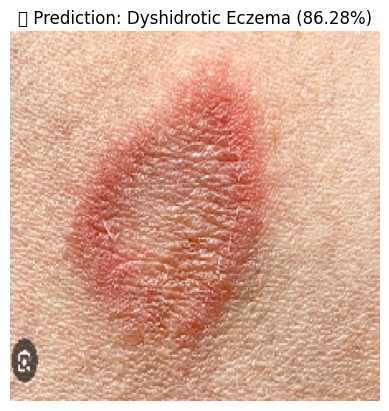

✅ Predicted Class: Dyshidrotic Eczema
🎯 Confidence: 86.28%
--------------------------------------------------

📤 Upload an image (or type 'exit' to stop)...
➡️ Type 'upload' to continue or 'exit' to stop: upload


Saving Screenshot 2025-10-26 175728.png to Screenshot 2025-10-26 175728.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


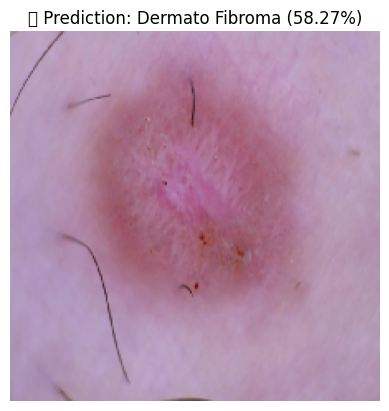

✅ Predicted Class: Dermato Fibroma
🎯 Confidence: 58.27%
--------------------------------------------------

📤 Upload an image (or type 'exit' to stop)...
➡️ Type 'upload' to continue or 'exit' to stop: upload


Saving Screenshot 2025-10-26 180300.png to Screenshot 2025-10-26 180300.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


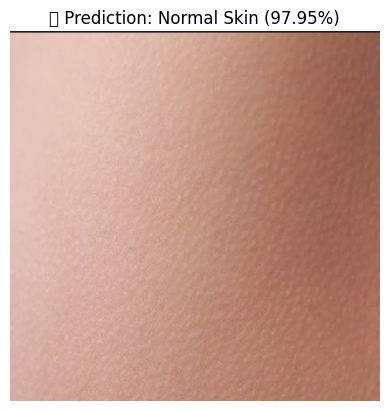

✅ Predicted Class: Normal Skin
🎯 Confidence: 97.95%
--------------------------------------------------

📤 Upload an image (or type 'exit' to stop)...
➡️ Type 'upload' to continue or 'exit' to stop: upload


Saving Screenshot 2025-10-26 180353.png to Screenshot 2025-10-26 180353.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


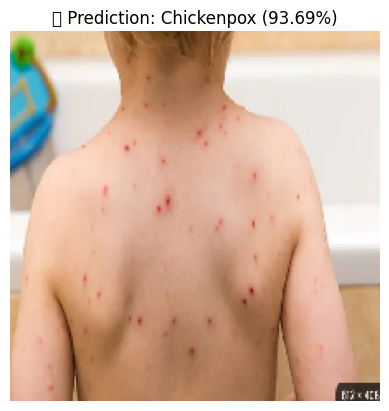

✅ Predicted Class: Chickenpox
🎯 Confidence: 93.69%
--------------------------------------------------

📤 Upload an image (or type 'exit' to stop)...
➡️ Type 'upload' to continue or 'exit' to stop: upload


Saving Screenshot 2025-10-26 180458.png to Screenshot 2025-10-26 180458.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


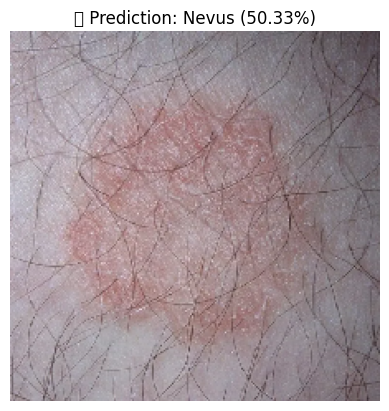

✅ Predicted Class: Nevus
🎯 Confidence: 50.33%
--------------------------------------------------

📤 Upload an image (or type 'exit' to stop)...
➡️ Type 'upload' to continue or 'exit' to stop: upload


Saving Screenshot 2025-10-26 180624.png to Screenshot 2025-10-26 180624.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


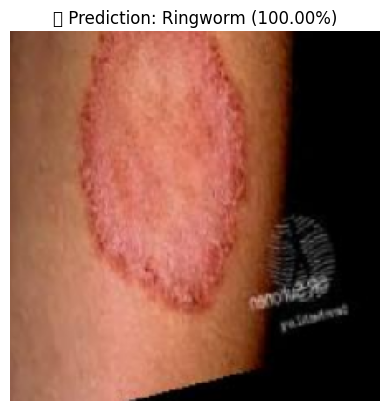

✅ Predicted Class: Ringworm
🎯 Confidence: 100.00%
--------------------------------------------------

📤 Upload an image (or type 'exit' to stop)...
➡️ Type 'upload' to continue or 'exit' to stop: upload


Saving Screenshot 2025-10-26 180751.png to Screenshot 2025-10-26 180751.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


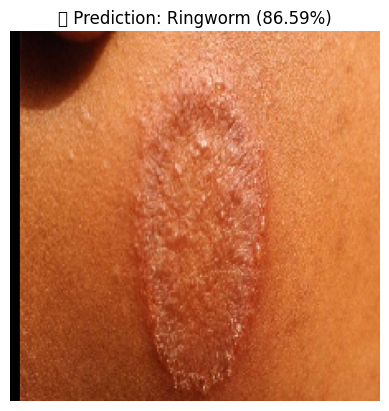

✅ Predicted Class: Ringworm
🎯 Confidence: 86.59%
--------------------------------------------------

📤 Upload an image (or type 'exit' to stop)...
➡️ Type 'upload' to continue or 'exit' to stop: upload


Saving Screenshot 2025-10-26 180845.png to Screenshot 2025-10-26 180845.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


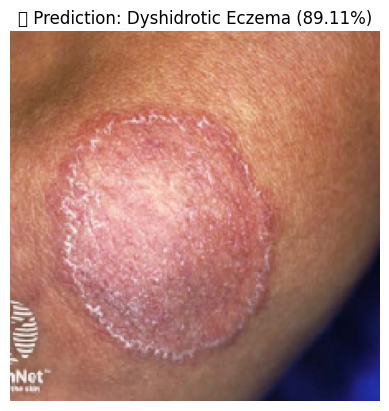

✅ Predicted Class: Dyshidrotic Eczema
🎯 Confidence: 89.11%
--------------------------------------------------

📤 Upload an image (or type 'exit' to stop)...
➡️ Type 'upload' to continue or 'exit' to stop: exit

👋 Exiting prediction loop. Goodbye!


In [ ]:
 # ======================================================
# Manual Upload Loop for Skin Disease Prediction
# ======================================================
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

# ======================================================
# Load Trained Model
# ======================================================
model_path = "best_resnet50_scheduler_10epochs.h5"  # ✅ Update if different
model = tf.keras.models.load_model(model_path)

# Load class names (from your training generator)
class_indices = train_generator.class_indices
classes = list(class_indices.keys())

print("\n Model loaded successfully!")
print(f"Classes detected ({len(classes)}): {classes}")

# ======================================================
# Continuous Upload Loop
# ======================================================
while True:
    print("\n📤 Upload an image (or type 'exit' to stop)...")
    user_input = input("➡️ Type 'upload' to continue or 'exit' to stop: ").strip().lower()

    if user_input == "exit":
        print("\n👋 Exiting prediction loop. Goodbye!")
        break

    elif user_input == "upload":
        uploaded = files.upload()  # Opens file picker in Colab

        for filename in uploaded.keys():
            # Load and preprocess the image
            img = image.load_img(filename, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

            # Predict
            preds = model.predict(img_array)
            pred_class = np.argmax(preds[0])
            confidence = np.max(preds[0]) * 100

            # Display image + result
            plt.imshow(img)
            plt.axis("off")
            plt.title(f"🧠 Prediction: {classes[pred_class]} ({confidence:.2f}%)")
            plt.show()

            print(f"✅ Predicted Class: {classes[pred_class]}")
            print(f"🎯 Confidence: {confidence:.2f}%")
            print("-" * 50)

    else:
        print("⚠️ Invalid input! Please type 'upload' or 'exit'.")
